<a href="https://colab.research.google.com/github/silviajlb/Titanic---first-kaggle-competition/blob/main/ML3_TITANIC__Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Librerias

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns', None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Nuclio/M4. Machine learning (parte 1)/Notebooks/ML3 - Kaggle competition/train.csv')

In [ ]:
print(df.shape)

(891, 12)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ML Preprocessing

Eliminamos las columnas PassengerId y Ticket

In [ ]:
df = df.set_index('PassengerId')

In [ ]:
del df['Ticket']

Name

In [ ]:
# Creamos una columna para la longitud del nombre
df['Name_letters'] = df['Name'].str.len()

In [ ]:
# Numero de palabras
df['Name_words'] = df["Name"].apply(lambda n: len(n.split()))

In [ ]:
del df['Name']

Sex

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Cambiamos el formato de la columna Sex
df['Sex'] = np.where(df['Sex'] == 'male', True, False)

Cabin

In [ ]:

map_values = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4
}

df['Cabin_letter'] = df['Cabin'].map(map_values)


In [ ]:
# Primera letra cabina
df['Cabin_letter'] = df['Cabin'].str[0]

In [ ]:
del df['Cabin']

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_letters,Name_words,Cabin_letter
PassengerId,,,,,,,,,,,
1,0,3,True,22.0,1,0,7.2500,S,23,4,NaN
2,1,1,False,38.0,1,0,71.2833,C,51,7,C
3,1,3,False,26.0,0,0,7.9250,S,22,3,NaN
4,1,1,False,35.0,1,0,53.1000,S,44,7,C
5,0,3,True,35.0,0,0,8.0500,S,24,4,NaN


In [ ]:
df.shape

(891, 11)

## Data cleaning

El step del data cleaning es el cajón de sastre donde corregiremos las particularidades del dataset más allá del ML preprocessing estandar. Por ejemplo:
* Eliminar registros duplicados
* Eliminar filas sin target informado
* Eliminar columnas irrelevantes
* Corregir erratas en literales
* Corregir data types

In [ ]:
# son duplicados pq no tenemos en cuenta el passengerid, simplemente tienen caracteristicas parecidas
df.duplicated().sum()

17

In [ ]:
df.shape

(891, 11)

In [ ]:
# Eliminar nulos target
df['Survived'].isnull().sum()

0

corregir erratas en literales

In [ ]:
df['Cabin_letter'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    bool   
 3   Age           714 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked      889 non-null    object 
 8   Name_letters  891 non-null    int64  
 9   Name_words    891 non-null    int64  
 10  Cabin_letter  204 non-null    object 
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 77.4+ KB


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_letters,Name_words,Cabin_letter
PassengerId,,,,,,,,,,,
1,0,3,True,22.0,1,0,7.2500,S,23,4,NaN
2,1,1,False,38.0,1,0,71.2833,C,51,7,C
3,1,3,False,26.0,0,0,7.9250,S,22,3,NaN
4,1,1,False,35.0,1,0,53.1000,S,44,7,C
5,0,3,True,35.0,0,0,8.0500,S,24,4,NaN


## EDA

Analisis de las distribuciones de las variables.

In [ ]:
target = 'Survived'
features = df.columns[df.columns!=target]

X = df[features]
y = df[target]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Name_letters,891.0,26.965208,9.281607,12.00,20.0000,25.0000,30.0,82.0000
Name_words,891.0,4.067340,1.168866,3.00,3.0000,4.0000,4.0,14.0000


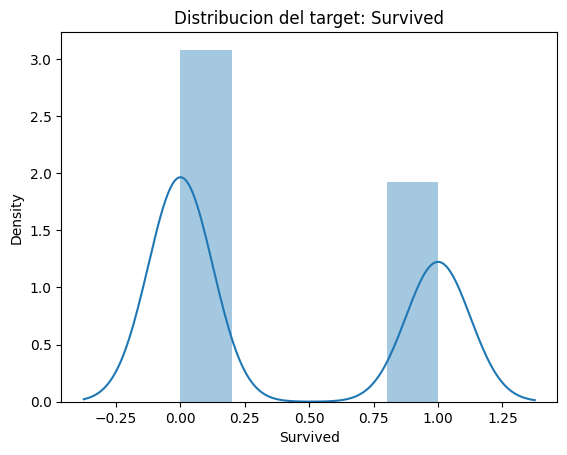

In [ ]:
#Distribucion target
sns.distplot(y)
plt.title('Distribucion del target: '+ target)
plt.show()

In [ ]:
# Clasifico las variables en categóricas, numéricas y booleanas
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_bool = df.select_dtypes(include=['bool']).columns.tolist()
var_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
len(var_cat) + len(var_num) + len(var_bool)

11

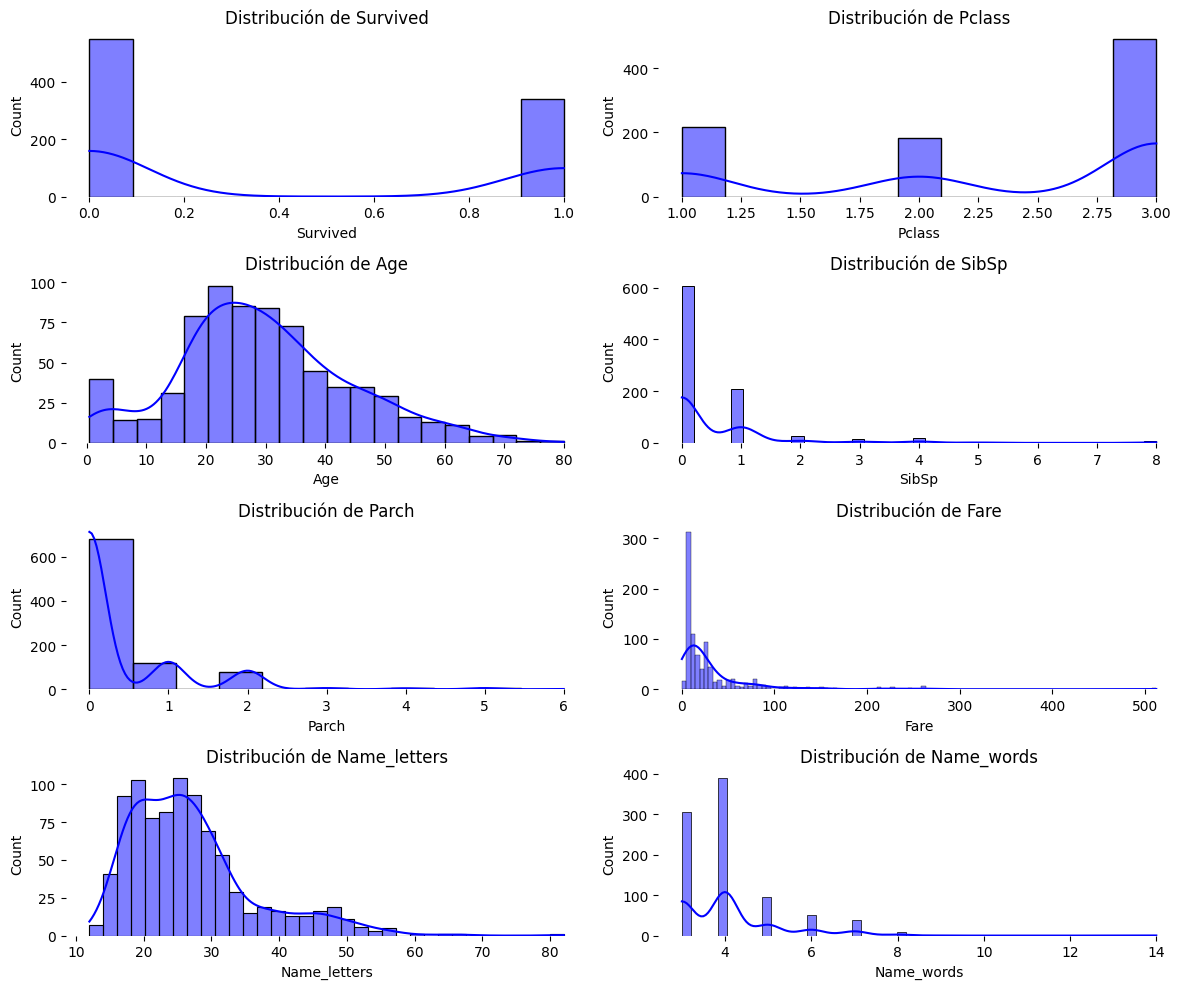

In [ ]:
#Histogramas para variables numéricas
plt.figure(figsize=(12, 10))
for i, variable in enumerate(var_num, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[variable], kde=True, color='blue')
    plt.title(f'Distribución de {variable}', fontsize=12, color='black')
    sns.despine(left=True, bottom=True)

# Ajusta el diseño de la figura
plt.tight_layout()
plt.show()

In [ ]:
#dejamos los outliers

In [ ]:
#Para categóricos value_counts
for var in var_cat:
    counts = df[var].value_counts().sort_index()  # Ordena los resultados
    print(f'Value Counts para {var}:\n{counts}\n')
    print('---------------------------')

Value Counts para Embarked:
C    168
Q     77
S    644
Name: Embarked, dtype: int64

---------------------------
Value Counts para Cabin_letter:
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Cabin_letter, dtype: int64

---------------------------


In [ ]:
#Para booleanos value_counts
for var in var_bool:
    counts = df[var].value_counts().sort_index()  # Ordena los resultados
    print(f'Value Counts para {var}:\n{counts}\n')
    print('---------------------------')

Value Counts para Sex:
False    314
True     577
Name: Sex, dtype: int64

---------------------------


## Imputar valores en nulos

Algunas de las estrategias mas comunes:
* Imputar valor outlier (-999, 'Unknown')
* Imputar media en numericos
* Imputar moda en categoricos
* Imputar 0

In [ ]:
df.isnull().sum() / len(df) * 100

Survived         0.000000
Pclass           0.000000
Sex              0.000000
Age             19.865320
SibSp            0.000000
Parch            0.000000
Fare             0.000000
Embarked         0.224467
Name_letters     0.000000
Name_words       0.000000
Cabin_letter    77.104377
dtype: float64

Cabin letter

In [ ]:
df['Cabin_letter'].fillna('UnKnown', inplace = True)

Age

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

Embarked

In [ ]:
df['Embarked'].fillna('UnKnown', inplace = True)

In [ ]:
#Comprobamos
df.isnull().sum().sum()

0

## Encoding categoricos

3 opciones:
* Si tienen un sentido ordinal -> convertir a numerico.
* Si tienen un sentido cardinal:
  * 2 posibles categorias -> indicador booleano
  * más de 2 categorias -> One-Hot-Encoding

In [ ]:
l_cat = list(df.select_dtypes(include='object').columns)
print('Variables categóricas:', l_cat)

Variables categóricas: ['Embarked', 'Cabin_letter']


In [ ]:
df = pd.get_dummies(data=df, columns = l_cat)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name_letters,Name_words,Embarked_C,Embarked_Q,Embarked_S,Embarked_UnKnown,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T,Cabin_letter_UnKnown
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,True,22.0,1,0,7.2500,23,4,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,1,False,38.0,1,0,71.2833,51,7,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,3,False,26.0,0,0,7.9250,22,3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,False,35.0,1,0,53.1000,44,7,0,0,1,0,0,0,1,0,0,0,0,0,0
5,0,3,True,35.0,0,0,8.0500,24,4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(891, 22)

## Eliminar alta correlación

In [ ]:
target = 'Survived'
features = df.columns[df.columns!=target]

X = df[features]
y = df[target]

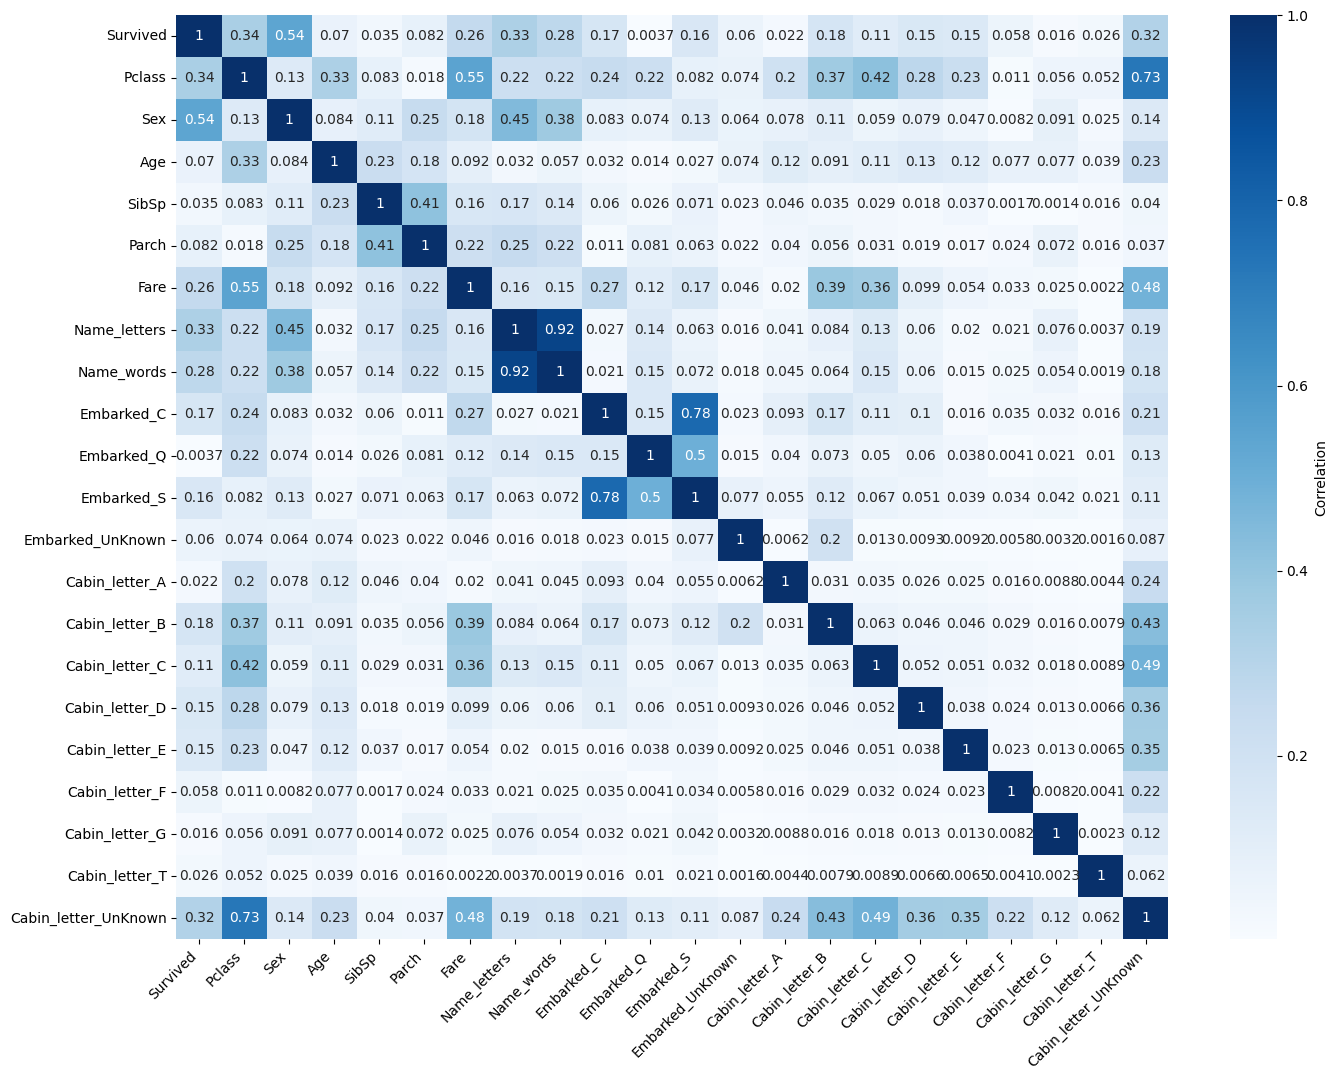

In [ ]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(16, 12))

# Crea el heatmap
heatmap = sns.heatmap(df.corr().abs(), annot=True, cmap='Blues', cbar_kws={'label': 'Correlation'})

# Ajusta el tamaño de las etiquetas en los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=10)

plt.show()

In [ ]:
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(df,y,0.92)
highly_corr


# esta función nos devuelve dos variables con una correlación superior a 0.95
# además nos dice cual de las dos eliminar, aquella que está menos correlacionada con el target

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,Name_words,Name_letters,0.922586,0.276512,0.33235,Name_words


In [ ]:
list(highly_corr['F_to_delete'])

['Name_words']

In [ ]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(highly_corr['F_to_delete'])
df.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['Name_words']


## Eliminar mínima varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Eliminamos columnas practicamente constantes (nula varianza, correlación)
vt = VarianceThreshold(threshold = 0.01)   #variancia donde el umbral sea por debajo del 1%
vt.fit(df)

cols_lowvar = df.columns[vt.get_support()==False]
df.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

3  low variance features were removed:
 ['Embarked_UnKnown', 'Cabin_letter_G', 'Cabin_letter_T']


In [ ]:
df.shape

(891, 18)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name_letters,Embarked_C,Embarked_Q,Embarked_S,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_UnKnown
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,True,22.0,1,0,7.2500,23,0,0,1,0,0,0,0,0,0,1
2,1,1,False,38.0,1,0,71.2833,51,1,0,0,0,0,1,0,0,0,0
3,1,3,False,26.0,0,0,7.9250,22,0,0,1,0,0,0,0,0,0,1
4,1,1,False,35.0,1,0,53.1000,44,0,0,1,0,0,1,0,0,0,0
5,0,3,True,35.0,0,0,8.0500,24,0,0,1,0,0,0,0,0,0,1


# Split X-y

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: Survived
Variables a utilizar en el modelo: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_letters', 'Name_words', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_UnKnown', 'Cabin_letter_A', 'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E', 'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_T', 'Cabin_letter_UnKnown']


# Target distribution

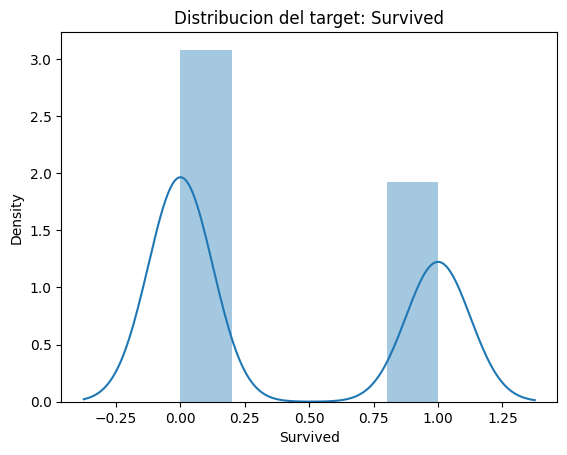

In [ ]:
#Distribucion target
sns.distplot(y)
plt.title('Distribucion del target: '+ target)
plt.show()

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
X_train = X
y_train = y

# Rescaling

Definimos el scaler en el train (.fit_transform).

In [ ]:
# No reescalamos en un modelo de reglas

In [ ]:
from sklearn.preprocessing import StandardScaler

# TRAIN MODEL

## Model competition

* Prueba distintos modelos de https://scikit-learn.org/stable/modules/classes.html
y mide su performance con Cross Validation.
* Para ello utiliza la funcion evaluate_classification() para registrar los resultados del benchmark de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Algunos modelos a probar:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
evaluate_classification(model = LogisticRegression(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.86787,0.855218


In [ ]:
evaluate_classification(model = RandomForestClassifier(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.867819
0,LogisticRegression(),0.867870,0.855218


In [ ]:
evaluate_classification(model = XGBClassifier(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.867819
2,"XGBClassifier(base_score=None, booster=None, c...",0.999656,0.857865
0,LogisticRegression(),0.867870,0.855218


In [ ]:
evaluate_classification(model = LGBMClassifier(),
                    X=X_train, y=y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Info] Number of positive: 257, number of negative: 411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 16
[LightGBM] [Info] [binary:BoostF

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.867819
2,"XGBClassifier(base_score=None, booster=None, c...",0.999656,0.857865
3,LGBMClassifier(),0.998802,0.856646
0,LogisticRegression(),0.867870,0.855218


In [ ]:
evaluate_classification(model = KNeighborsClassifier(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.867819
2,"XGBClassifier(base_score=None, booster=None, c...",0.999656,0.857865
3,LGBMClassifier(),0.998802,0.856646
0,LogisticRegression(),0.867870,0.855218
4,KNeighborsClassifier(),0.881286,0.709069


## Hyperparameter tuning

La hiperparametrización puede ser costosa sino acotamos lo suficiente el abanico de posibles valores. Como consejo, centrarse en hiperparametrizar los primeros valores que aparecen dentro de la funcion del algoritmo, suelen ser los más determinantes, y no dejar de consultar la documentacion para entender que posibles valores adopta cada parametro.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Dame un diccionario con una lista de posibles valores para cada parámetro que puedes ajustar en el LGBMClassifier(objetivo mejorar el overfitting):

In [ ]:
posibilidades_parametros = {
    'max_depth': [3,4,5],
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0.1, 0.3, 0.5],
    'reg_lambda': [0.1, 0.3, 0.5],
    'n_estimators': [25, 50, 75, 100],
}


In [ ]:
search_hp = RandomizedSearchCV(estimator=LGBMClassifier(),
                               param_distributions = posibilidades_parametros,
                               scoring='roc_auc',     # metrica a optimizar: AUC Cross-ValidaC
                               cv = 4,                                    # numero de folds para cross-validation
                               n_iter = 50,                               # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1,
                               verbose=True)

# va a probar aleatoriamente 50 experimentos (n_iter),
# le paso el diccionario de los parametros y sus posibles variables
# y lç la métrica para determinar cual es el mejor (AUC Cross-Valida) y le paso cuando cv

In [ ]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [25, 50, 75, 100],
                                        'num_leaves': [10, 20, 30],
                                        'reg_alpha': [0.1, 0.3, 0.5],
                                        'reg_lambda': [0.1, 0.3, 0.5]},
                   scoring='roc_auc', verbose=True)

In [ ]:
search_hp.best_score_
# Mejora de 0.860386 a 0.8634861349680633 así que nos quedamos con los nuevos parametros
#search_hp tiene opciones para comparar

0.8726790060639844

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", -search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: LGBMClassifier(max_depth=3, n_estimators=75, num_leaves=20, reg_alpha=0.3,
               reg_lambda=0.1)

 The best AUC: -0.8726790060639844

 The best parameters across ALL searched params:
 {'reg_lambda': 0.1, 'reg_alpha': 0.3, 'num_leaves': 20, 'n_estimators': 75, 'max_depth': 3, 'learning_rate': 0.1}


## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso (si conseguimos mejorar a la parametrización por default).



In [ ]:
best_model = search_hp.best_estimator_

# ALTERNATIVA:  (esto hacerlo si el modelo es mejor antes de la hiperparametrización)
# model = SGDRegressor()
# model.fit(X_train_std)

# PREDICT FOR SUBMISSION

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
X_pred = pd.read_csv('/content/drive/MyDrive/Nuclio/M4. Machine learning (parte 1)/Notebooks/ML3 - Kaggle competition/test.csv')
X_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Model features

In [ ]:
features_model =  list(best_model.feature_name_)
print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:
 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_letters', 'Name_words', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_UnKnown', 'Cabin_letter_A', 'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E', 'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_T', 'Cabin_letter_UnKnown']


## ML Preprocessing

Se deben acometer las mismas transformaciones que las realizadas en el preprocessing del train data:
* Generacion de nuevas variables
* Imputación de nulos (mismos valores)
* One Hot Encoding
* Drop de columnas
<br><br>
No repetimos:
* Analisis exploratorio
* Analisis de altas correlaciones
* Analisis de baja varianza

In [ ]:
X_pred.duplicated().sum()

0

In [ ]:
X_pred.shape

(418, 11)

In [ ]:
X_pred = X_pred.set_index('PassengerId')
del X_pred['Ticket']

X_pred['Name_letters'] = X_pred['Name'].str.len()
del X_pred['Name']

X_pred['Sex'] = np.where(X_pred['Sex'] == 'male', True, False)

map_values = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4
}

X_pred['Cabin_letter'] = X_pred['Cabin'].map(map_values)
X_pred['Cabin_letter'] = X_pred['Cabin'].str[0]
del X_pred['Cabin']

In [ ]:
X_pred['Cabin_letter'].fillna('UnKnown', inplace = True)
X_pred['Age'].fillna(df['Age'].mean(), inplace = True)
X_pred['Embarked'].fillna('UnKnown', inplace = True)
X_pred['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [ ]:
l_cat = list(X_pred.select_dtypes(include='object').columns)
print('Variables categóricas:', l_cat)

X_pred = pd.get_dummies(data=X_pred, columns = l_cat)

Variables categóricas: ['Embarked', 'Cabin_letter']


In [ ]:
del X_pred['Cabin_letter_G']

In [ ]:
X_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_letters,Embarked_C,Embarked_Q,Embarked_S,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_UnKnown
PassengerId,,,,,,,,,,,,,,,,,
892,3,True,34.5,0,0,7.8292,16,0,1,0,0,0,0,0,0,0,1
893,3,False,47.0,1,0,7.0000,32,0,0,1,0,0,0,0,0,0,1
894,2,True,62.0,0,0,9.6875,25,0,1,0,0,0,0,0,0,0,1
895,3,True,27.0,0,0,8.6625,16,0,0,1,0,0,0,0,0,0,1
896,3,False,22.0,1,1,12.2875,44,0,0,1,0,0,0,0,0,0,1


## Check model features

Check de variables. Las variables del dataset para PREDICT deben coincidir con las variables utilizadas en el entrenamiento.

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 17
Variables en modelos: 21
¿Match?: False


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan el el dataset:\n', missing_features)

Variables que faltan el el dataset:
 ['Name_words', 'Embarked_UnKnown', 'Cabin_letter_G', 'Cabin_letter_T']


In [ ]:
for col in missing_features:
  X_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 []


In [ ]:
X_pred.drop(columns = drop_features, inplace=True)

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 21
Variables en modelos: 21
¿Match?: False


In [ ]:
# Reordena variables
X_pred = X_pred[features_model]

## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

In [ ]:
# No reescalamos en un modelo de reglas

## Predictions

In [ ]:
predictions = best_model.predict(X_pred)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.

In [ ]:
submission = pd.DataFrame(predictions, columns=['Survived'], index = X_pred.index)

In [ ]:
submission.reset_index(inplace=True)
submission.shape

(418, 2)

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
submission.to_csv('/content/drive/MyDrive/Nuclio/M4. Machine learning (parte 1)/Notebooks/ML3 - Kaggle competition/predictions.csv', index=False)